# Limits of Diversification

In [6]:
%load_ext autoreload
%autoreload 2 
import pandas as pd
import numpy as np
import stark

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
ind_returns = stark.get_ind_returns()
ind_nfirms = stark.get_ind_nfirms()
ind_size = stark.get_ind_size()

In [9]:
print(ind_returns.shape)
print(ind_nfirms.shape)
print(ind_size.shape)

(1110, 30)
(1110, 30)
(1110, 30)


In [10]:
ind_nfirms.head(2)

,food,beer,smoke,games,books,hshld,clths,hlth,chems,txtls,...,telcm,servs,buseq,paper,trans,whlsl,rtail,meals,fin,other
1926-07,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-08,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4


In [11]:
ind_size.head(2)

,food,beer,smoke,games,books,hshld,clths,hlth,chems,txtls,...,telcm,servs,buseq,paper,trans,whlsl,rtail,meals,fin,other
1926-07,35.98,7.12,59.72,26.41,12.02,22.27,18.36,25.52,57.59,6.18,...,350.36,13.60,56.70,35.35,66.91,1.19,46.65,10.82,18.83,24.25
1926-08,36.10,6.75,60.47,27.17,13.33,22.13,19.83,25.80,62.13,6.20,...,353.27,14.75,57.74,37.86,67.99,0.90,46.57,11.00,18.88,25.51


In [14]:
ind_market_cap = ind_nfirms * ind_size
print(ind_market_cap.shape)
ind_market_cap.head(2)

(1110, 30)


,food,beer,smoke,games,books,hshld,clths,hlth,chems,txtls,...,telcm,servs,buseq,paper,trans,whlsl,rtail,meals,fin,other
1926-07,1547.14,21.36,955.52,184.87,24.04,178.16,220.32,178.64,979.03,80.34,...,1751.80,40.80,396.90,212.10,4951.34,2.38,1539.45,64.92,225.96,97.00
1926-08,1552.30,20.25,967.52,190.19,26.66,177.04,237.96,180.60,1056.21,80.60,...,1766.35,44.25,404.18,227.16,5031.26,1.80,1536.81,66.00,226.56,102.04


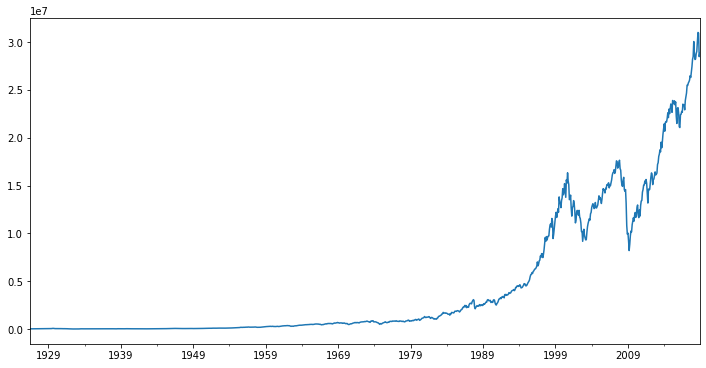

In [19]:
total_market_cap = ind_market_cap.sum(axis="columns")
total_market_cap.plot(figsize=(12, 6));

In [20]:
ind_cap_weight = ind_market_cap.divide(total_market_cap, axis="rows")
ind_cap_weight.head(3)

,food,beer,smoke,games,books,hshld,clths,hlth,chems,txtls,...,telcm,servs,buseq,paper,trans,whlsl,rtail,meals,fin,other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879


In [23]:
ind_cap_weight.loc["1926"].sum(axis="columns")

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

<AxesSubplot:>

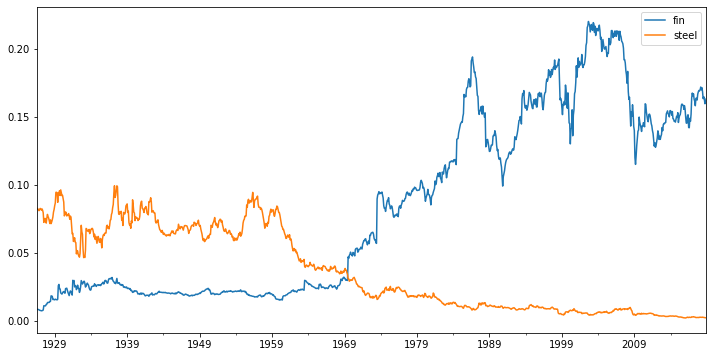

In [26]:
ind_cap_weight[["fin", "steel"]].plot(figsize=(12, 6))

<AxesSubplot:>

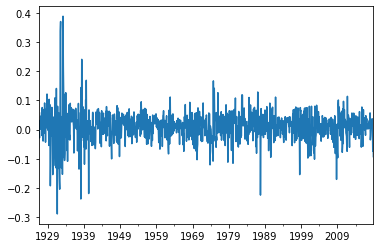

In [27]:
total_market_return = (ind_cap_weight * ind_returns).sum(axis="columns")
total_market_return.plot()

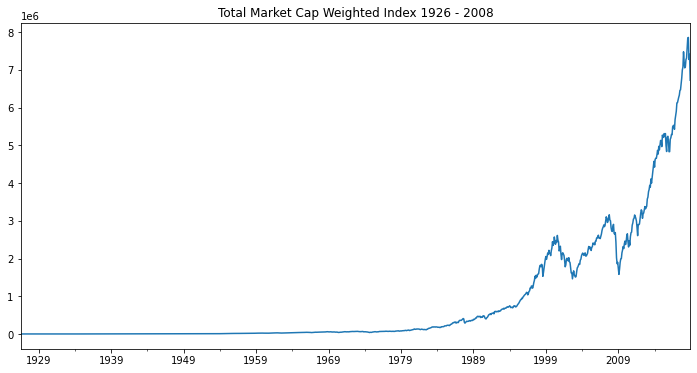

In [29]:
total_market_index = stark.calculate_drawdown(total_market_return).wealth
total_market_index.plot(
    figsize=(12, 6), 
    title="Total Market Cap Weighted Index 1926 - 2008"
);

<AxesSubplot:>

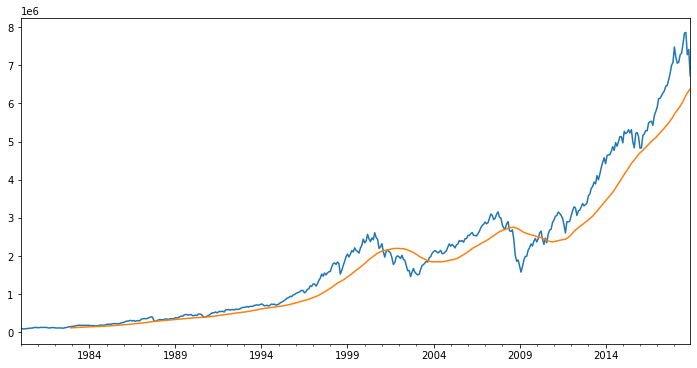

In [31]:
total_market_index.loc["1980":].plot(figsize=(12, 6))
total_market_index.loc["1980":].rolling(window=36).mean().plot(figsize=(12, 6))

<AxesSubplot:>

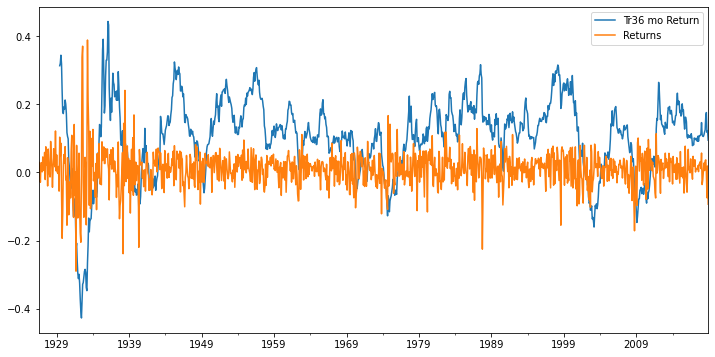

In [36]:
#total marked index
tmi_tr36_returns = total_market_return.rolling(window=36).aggregate(
    stark.calculate_annualize_rets, 
    periods_per_year = 12
)
tmi_tr36_returns.plot(
    figsize=(12, 6), 
    label = "Tr36 mo Return", 
    legend=True
)
total_market_return.plot(
    label="Returns", 
    legend=True
)

# Rolling Correlations - Along with MultiIndexes and "group by"

In [38]:
ts_correlations = ind_returns.rolling(window=36).corr()
ts_correlations.tail()

food      beer     smoke     games     books     hshld  \
2018-12 whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  clths      hlth     chems     txtls  ...     telcm  \
2018-12 whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  servs     buseq     paper     trans     whlsl     rtail  \
2018-12 whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  meals       fin     other  
2018-12 whlsl  0.643879  0.746480  0.767652  
        rtail  0.616947  0.611883  0.619918  
        meals  1.000000  0.502563  0.605226  
        fin    0.502563  1.000000  0.734837  
        other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [41]:
ts_correlations.index.names = ["date", "industry"]
ts_correlations.tail()

food      beer     smoke     games     books     hshld  \
date    industry                                                               
2018-12 whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     clths      hlth     chems     txtls  ...     telcm  \
date    industry                                          ...             
2018-12 whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     servs     buseq     paper     trans     whlsl     rtail  \
date    industry                                                               
2018-12 whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     meals       fin     other  
date    industry                                
2018-12 whlsl     0.643879  0.746480  0.767652  
        rtail     0.616947  0.611883  0.619918  
        meals     1.000000  0.502563  0.605226  
        fin       0.502563  1.000000  0.734837  
        other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [42]:
ind_tr36_corr = ts_correlations.groupby(level = "date").apply(lambda corr_mat: corr_mat.values.mean())


<AxesSubplot:xlabel='date'>

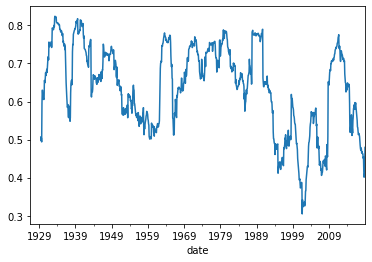

In [43]:
ind_tr36_corr.plot()

<AxesSubplot:xlabel='date'>

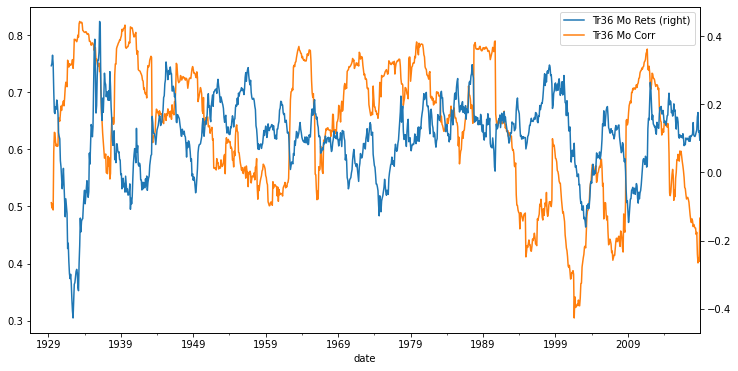

In [46]:
tmi_tr36_returns.plot(
    label="Tr36 Mo Rets", 
    figsize=(12, 6), 
    legend=True, 
    secondary_y=True
)
ind_tr36_corr.plot(
    label="Tr36 Mo Corr", 
    figsize=(12, 6), 
    legend=True
    
)

<AxesSubplot:xlabel='date'>

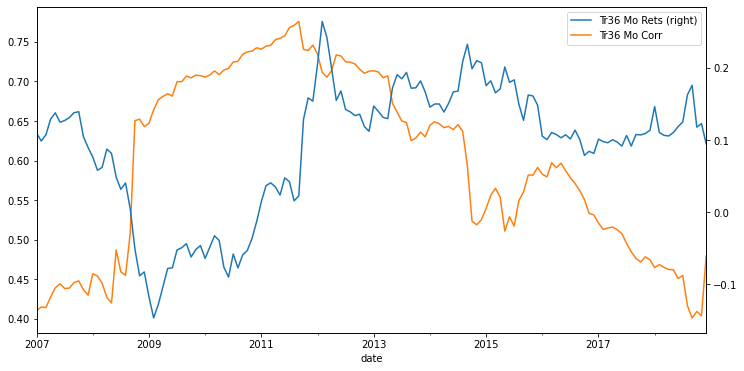

In [47]:
tmi_tr36_returns.loc["2007":].plot(
    label="Tr36 Mo Rets", 
    figsize=(12, 6), 
    legend=True, 
    secondary_y=True
)
ind_tr36_corr.loc["2007":].plot(
    label="Tr36 Mo Corr", 
    figsize=(12, 6), 
    legend=True
    
)

In [48]:
tmi_tr36_returns.corr(ind_tr36_corr)

-0.28010065062884

In [50]:
#total_market_return.to_csv("../data/total_market_return.csv", )
total_market_return.to_csv("total_market_return.csv", )

In [53]:
total_market_return.isnull().sum()

0